## Missing Values Day 1

### Lifecycle of Data Science Project
1. Data collection strategy - Company, 3rd party API, surveys
2. Feature Engineering - Handling Missing Values

### Why Missing Values are formed ? Depression Survey
1. They hesitate to put down the information
2. Invalid Information
3. Men - salary
4. Women - age
5. People may have died

#### Data Science Projects - Dataset should be collected from multiple sources

### What are the different types of Missing Data ?
##### MCAR 
Missing Completely At Random : A variable is missing completely at random if the probability of being missing is same for all observations. When data is MCAR , there is absolutely no relation between the data missing and any other values, observed or missing, within dataset. In other words those missing datset are random subset of data. There is nothing systematic going on that make some data more likely to be missing than other.


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Age and Cabin is related - Not MCAR

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Embarked is not related to anything - MCAR

In [4]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


##### MNAR
Missing Not At Random : Systematic missing values.There is absolutely some relationship between the missing data and any other values, observed or missing within the dataset.

In [5]:
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

# Find mean of null values
df['cabin_null'].mean()

0.7710437710437711

In [6]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

##### MAR
Missing At Random

eg : Men - hide salary, Women - hide age 

### Techniques for handling, Missing values
1. Mean/ Median/ Mode replacement
2. Random Sample imputation
3. Capturing NAN Values with a new feature
4. End of Distribution imputation
5. Arbitary Imputation
6. Frequent categories imputation

### 1. Mean/ Median/ Mode Imputation
This imputation assume data are MCAR. Solve - Replace NAN with Mean/Median/Mode(Most frequent value)

In [7]:
df = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [9]:
def m_imp(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)

In [10]:
median = df.Age.median()
median

28.0

In [11]:
m_imp(df,'Age',median)

In [12]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [13]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

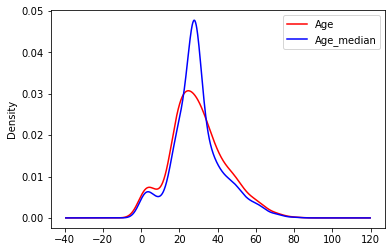

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color='red')
df['Age_median'].plot(kind='kde', ax=ax, color='blue')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages and Disadvantages of M/M/M imputation
#### Advantages
1. Easy to implement (Robust to outliers)
2. Faster way to obtain complete dataset

#### Disadvantages
1. Change or Disortion in the orginal variance
2. Impacts correlatipon